In [2]:
#% IMPORT THE PACKAGES NEEDED FOR THE SYSTEM

#%run matplotlib_setup.ipy
from matplotlib import pyplot as plt
import numpy as np
import kwant
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp


In [3]:
#% CONSTANTS

h = 6.626069e-34    # Planck constant (Js)
e = 1.602e-19      # electron charge (C)
c = 299792458       # Light celerity (m/s)
kB = 1.3806503e-23  # Boltzmann constant (kg m2/Ks2)
m_e = 9.1e-31       # electron mass (kg)

In [4]:
#% MAKING THE GEOMETRY

def make_system(a=1.0,t=1.0,R_ext=350,W=150,W_L=150,L_L=100,magn_activated=0): #% Define a system with several variables
    
    #% Graphene system
    graphene = kwant.lattice.honeycomb(a,norbs=1) 
    a_lat, b_lat = graphene.sublattices
    sys = kwant.Builder()
 
    # definition geometry
    def circle(pos): return (pos[0]**2 + pos[1]**2 <R_ext**2  and pos[0]**2 + pos[1]**2 >(R_ext-W)**2) \
                            or ((R_ext-W/2)<pos[0]<(R_ext+L_L )
                            and abs(pos[1])<W_L/2) \
                            or (-(R_ext-W/2)>pos[0]>-(R_ext+L_L) 
                            and abs(pos[1])<W_L/2) 
    
    # definition hopping for magentic field        
    def hopping(site_i, site_j, phi):
        xi, yi = site_i.pos
        xj, yj = site_j.pos
        return -t * exp(-1j*phi*pi/(h/e)*(xi-xj)* (yi + yj)/(a**2))#-1j * pi * phi / (h/e) * (xi - xj) * (yi + yj)/(a*a))


    sys[graphene.shape(circle, (R_ext-W/2,0))] = 0 # onsite energy is zero (latter a potential will be applied)
    hoppings = (((0, 0), a_lat, b_lat), ((0, 1), a_lat, b_lat), ((-1, 1), a_lat, b_lat))
    
     
    if magn_activated==0:
         sys[[kwant.builder.HoppingKind(*hoppingg) for hoppingg in hoppings]] = -t
    
    elif magn_activated==1:
        sys[graphene.neighbors()] = hopping
        
    else:
        print('Wrong input parameter for the magnetic field')
   
    
    
    
    
    
    sym=kwant.TranslationalSymmetry(graphene.vec((1,0)))
    def lead_shape(R): return abs(R[1]) < W_L/2
    
    Hlead =kwant.Builder(sym)
    Hlead[graphene.shape(lead_shape,(0,0) )]=0
    
    
    
    
    if magn_activated==0:
         Hlead[graphene.neighbors()]=-t
    
    elif magn_activated==1:
        Hlead[graphene.neighbors()] = hopping
        
    else:
        print('Wrong input parameter for the magnetic field')
   
    
    
    sys.attach_lead(Hlead)
    sys.attach_lead(Hlead.reversed())
  

    return sys

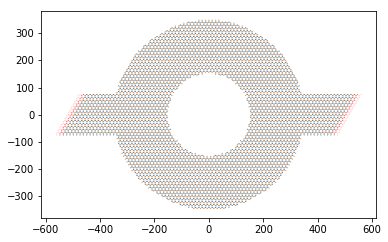

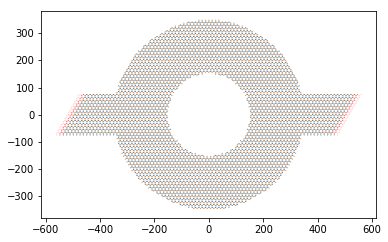

In [5]:
#% THE PLOT OF THE GRAPHENE RING

scaling_fact=50
#n2D=1.2e16
#scaling_fact=25
a0=0.246
a=a0*scaling_fact
t0=2.8
t=t0/scaling_fact
R_ext=350
W=200
W_L=150
L_L=100
magn_activated=0
H=make_system(a,t,R_ext,W,W_L,L_L,magn_activated)
kwant.plot(H)

In [6]:
#% TRANSMISSION 

scaling_fact=50
#n2D=1.2e16
#scaling_fact=25
a0=0.246
a=a0*scaling_fact
t0=2.8
t=t0/scaling_fact
R_ext=350
W=200
W_L=150
L_L=100
magn_activated=0

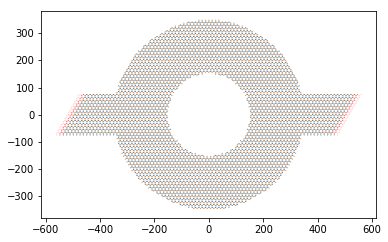

[1.e-06 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
[1.00000e-06 1.00009e-02 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 3.00007e-02 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 3.00007e-02 4.00006e-02 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 3.00007e-02 4.00006e-02 5.00005e-02
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 3.00007e-02 4.00006e-02 5.00005e-02
 6.00004e-02 0.00000e+00 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 3.00007e-02 4.00006e-02 5.00005e-02
 6.00004e-02 7.00003e-02 0.00000e+00 0.00000e+00]
[1.00000e-06 1.00009e-02 2.00008e-02 3.00007e-02 4.00006e-02 5.0000

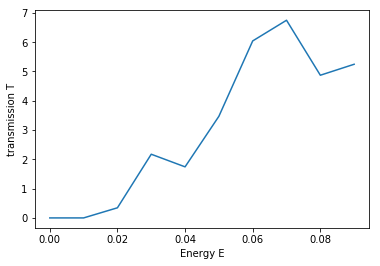

In [8]:
#% THE PLOT OF TRANSMISSION VS ENERGY

H=make_system(a,t,R_ext,W,W_L,L_L,magn_activated)
kwant.plot(H)

Hf=H.finalized()
max_E=0.1
n=10
E_vect=np.zeros(n)
T_vect=np.zeros(n)
init_val=0.000001
incr=(max_E-init_val)/n

Results=open("Ring_var_E_fixed_W_R.txt",'w') # Warning: reset every time the results of the .txt file
for i in range(0,n):  
  E_vect[i]=init_val
  smatrix = kwant.smatrix(Hf, energy = init_val)
  T_vect[i]=smatrix.transmission(1, 0)
  init_val=init_val+incr
  Results.write(str(E_vect[i])+"   "+str(T_vect[i])+"   "+"\n")
  print(E_vect)
Results.close()
plt.plot(E_vect,T_vect)
plt.ylabel('transmission T')
plt.xlabel('Energy E')
plt.show()

In [21]:
#% MAGNETIC FIELD

scaling_fact=50
#n2D=1.2e16
#scaling_fact=25
a0=0.246
a=a0*scaling_fact
#e=1.602e-19
t0=2.8
t=t0/scaling_fact
R_ext=350
W=150
W_L=150
L_L=100
magn_activated=1 # we activate the magnetic field here !

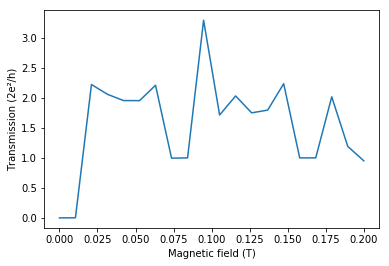

In [22]:
#% TRANSMISSION WITH ENERGY WITH B FIELD

H=make_system(a,t,R_ext,W,W_L,L_L,magn_activated)

H_mf=H.finalized()

#### For a realistic value of phi ####
#B = 0.05 # (Tesla) value of the magnetic field (well, the magnetic flux density for the purists among you)

#phi = B * a**2 *sqrt(3/2)/scaling_fact**2 # with 'a' being the scale value 

E=0.005
N = 20 # number of magnetic field values
Bmax = 0.2 # higher magnetic field
Bs = np.linspace(0, Bmax, N) # vector of the magnetic fields

G = np.zeros([N,1])

for i,B in enumerate(Bs):
    phi = B * a**2 *sqrt(3/2) /scaling_fact**2
    smatrix = kwant.smatrix(H_mf, energy = E,args=[phi] ) # transmission matrix (here this)
    T = smatrix.transmission(1, 0) # transmission value obtained from the left lead towards the right lead
    G[i] = T
    
plt.plot(Bs,G)

plt.xlabel('Magnetic field (T)')
plt.ylabel('Transmission (2e²/h)')

plt.show()
#data = []
#phis = np.linspace(0,1.,10)
#for phi in phis:
#    smatrix = kwant.smatrix(Hf, 3.3,args=[phi])
#    data.append(smatrix.transmission(1, 0))
#pyplot.plot(phis, data,'o');
#pyplot.xlabel('$\phi = BS/(h/e)$')
#pyplot.ylabel('g in unit of $(2e^2/h)$');
#pyplot.title('Aharonov-Effect')
